In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta, datetime

import math
import collections
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats

from matplotlib import pyplot as plt
from tqdm import tqdm

from util_read import engage_read, read_vids, engage_tweets_read, merge_engage_tweets, engage_metadata, compute_period_daily

In [2]:
# file_vids_filter_all = "/home/users/u6314203/pyProject/hip-popularity/data/engage16/filtered/vids_filter_all.csv" 
# engage_dataset_base = "/localdata/u6314203/dataset_engage16/tweeted_videos" 
# tweets_dataset_base = "/localdata/u6314203/dataset_tweets_engage/dataset_tweets_fixTZ"

file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"
tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

In [3]:
plt.rcParams.update({'axes.labelsize': 20, 
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

In [4]:
def visual_single_scatter(ax, vid, vdata):
    days, views = vdata["days"], vdata["viewCounts"]
    ax.scatter(days, views, s = 6.0)
    ax.set_xticks([30*x for x in range(len(days)//30+1)])
    ax.set_xlabel("No. days after upload")
    ax.set_ylabel("Daily views")

In [5]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112


Engage autos size: 25138
Engage comedy size: 31519
comedy:e-3wUlcaTZA done
comedy:16F5GcGcOdw done
Engage education size: 40311
education:jAhjPd4uNFY done
Engage entertainment size: 177236
Engage film size: 42439
film:JF5B0MXF6Kw done
Engage gaming size: 219709
Engage howto size: 59965
howto:jzbCTqhft-E done
Engage music size: 116884
music:aXcQ1EwCx0A done
music:ZKkMkV_gCn8 done
music:62-0tyOqFMY done
Engage news size: 37508
Engage people size: 220100
Engage science size: 31899
Engage sports size: 39129
Engage travel size: 12921


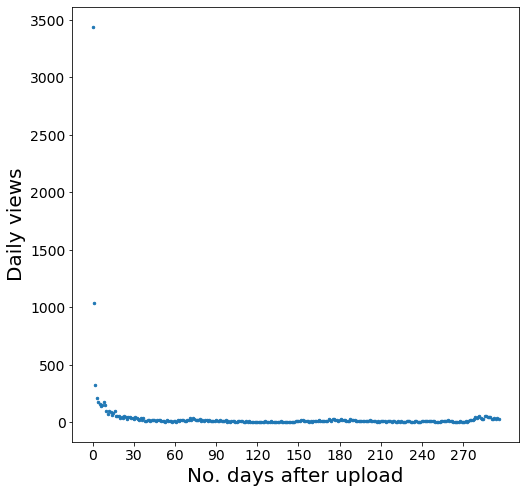

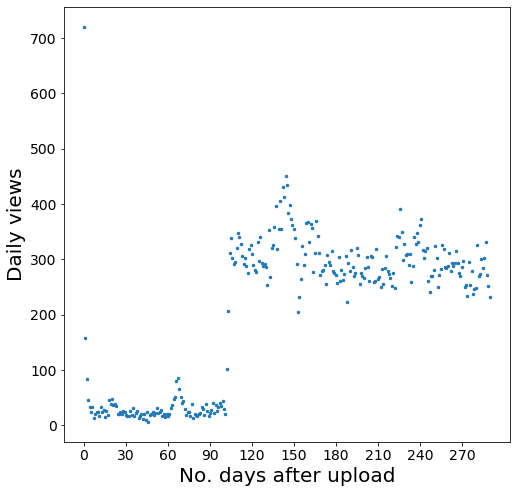

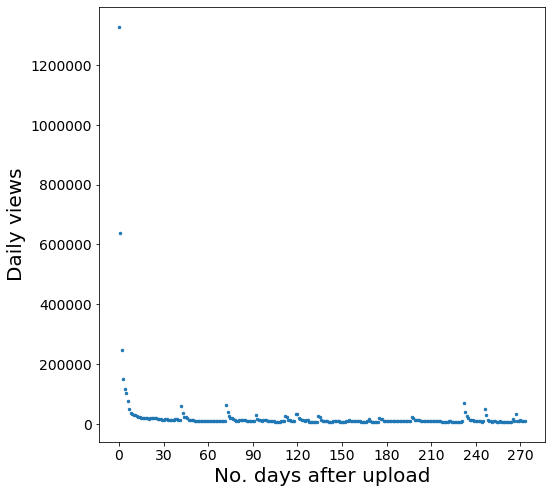

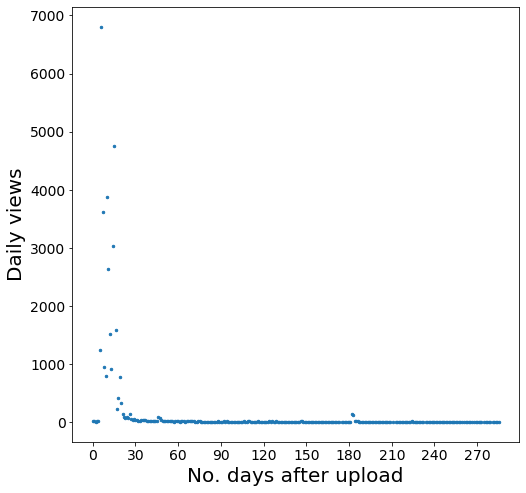

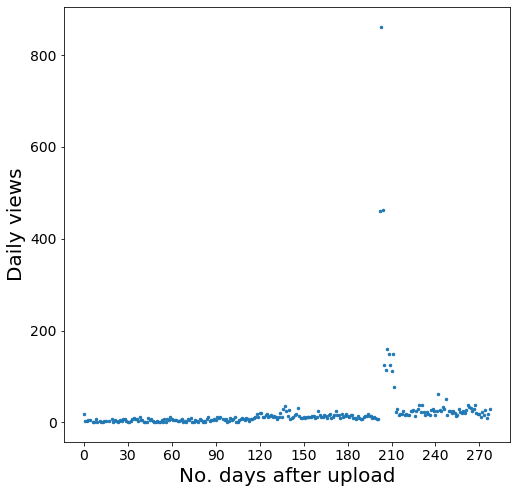

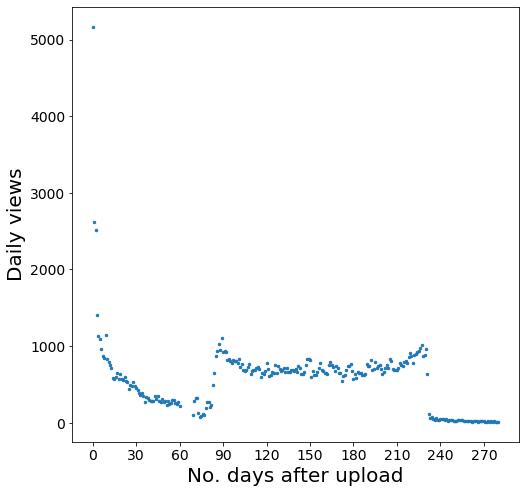

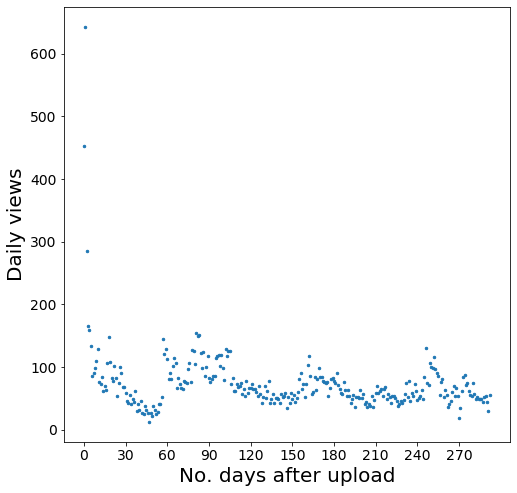

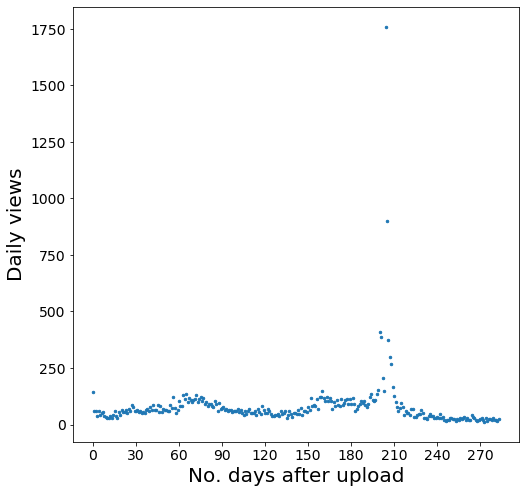

In [6]:
target_vids = set(["e-3wUlcaTZA", "e-3wUIcaTZA", \
                  "JF5B0MXF6Kw", \
                  "jAhjPd4uNFY", \
                  "ZKkMkV_gCn8", \
                  "jzbCTqhft-E", \
                  "62-0tyOqFMY", \
                  "16F5GcGcOdw", \
                  "aXcQ1EwCx0A"])

for category in categories_eligible[:]:
    engage_dataset = engage_read(engage_dataset_base, category)
    
    for k, vals in engage_dataset.items():
        if k in target_vids:
            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(1,1,1)
            visual_single_scatter(ax, k, vals)
            fig.savefig(f"figs/typical_samples/{k}.pdf", bbox_inches='tight')

            print(f"{category}:{k} done")   